# Identify Profitable Mobile Applications

The company, ExcellentApps, develops mobile applications that are free to download and install. The main source of revenue comes from in-app advertisements. It means the more users use the app and engage with the ads, the higher revenue company makes.

The applications are built in Android and iOS which are available in Google Play and App Store respectively.

In this project, we will identify the type of applications that are likely to attract a high volume of users so that developers can improve or create more of that kind.

To accomplish this goal, we will use two readily-available data sets:
- [Google play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) was scraped from Google Play Store and published publicly on Kaggle. The data contains approximately 10,000 Android applications with information about category, app name, rating, number of reviews, app size, number of installs, price, etc.
- [Mobile App Store](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) was scraped from iTunes Search API at the Apple Inc website and published publicly on Kaggle. The data contains more than 7000 Apple iOs mobile applications with some similar information like the Google Play one.

## Explore the data sets

In [1]:
import pandas as pd
# Read in Google Play dataset
google = pd.read_csv('googleplaystore.csv')
# Read in Apply Store dataset
apple = pd.read_csv('AppleStore.csv')

In [2]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
apple.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


At a glance, we see that some columns need to be cleaned up to have the right formats.

## Data Cleaning
### Application for English audience
It is worth to mention that ExcellentApps only designs applications for English-speaking audience. For this reason, any non-English applications should be removed from applications of interest.

In [4]:
# Write a function to detect non-English apps
def english_app(string):
    non_english_count = 0
    for char in string:
        if ord(char) > 127: # a non-english char will result > 127
            non_english_count +=1
    # eliminate cases where english apps have 1-3 special characters
    if non_english_count > 3:
        return False
    return True

In [5]:
# test function:
english_app('Docs To Go™ Free Office Suite')

True

In [6]:
# test function:
english_app('爱奇艺PPS -《欢乐颂2》电视剧热播')

False

The function above is not perfect, it will still fail if an English app has more than three special characters. However, that case is rare.

In [7]:
# Apply english_app function to remove non-english apps
google['App'] = google['App'][google['App'].apply(english_app)]
apple['track_name'] = apple['track_name'][apple['track_name'].apply(english_app)]

### Potential duplicated apps
There may be some duplicates in the collection of data. We should better remove duplicates for higher accuracy of the analysis.

In [8]:
# Duplicated apps in Google Play dataset
google['App'].duplicated().value_counts()

False    9616
True     1225
Name: App, dtype: int64

There are more than 1000 duplicates in the dataset. To decide which records should be removed, we will consider the number of reviews duplicated app has. An application has more reviews means it is the latest record.

In [9]:
# create a dictionary of unique apps with max reviews
android_apps = google.groupby('App')['Reviews'].agg('max').to_dict()

In [10]:
android_clean = []
android_added = []
# create a list of apps with reviews equal max reivews in dictionary
for row in google.iterrows():
    row = row[1]
    app_name = row['App']
    app_review = row['Reviews']
    if ((app_name in android_apps) and 
        (app_review == android_apps[app_name]) and
        (app_name not in android_added)):
            android_clean.append(row.values)
            android_added.append(app_name)

In [11]:
# convert list of list to a DataFrame
android_clean = pd.DataFrame(android_clean, columns = google.columns)
android_clean.shape[0]

9615

We have removed 1015 duplicated applications for Google Play dataset.<br>
Let's check the Apple Store dataset

In [12]:
# Duplicated apps in Apple Store
print(apple['track_name'].duplicated().value_counts())
apple[apple['track_name'].duplicated()].head()

False    6182
True     1015
Name: track_name, dtype: int64


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1193,405667771,NaN,90725376,USD,0.0,7446,8,4.0,4.5,5.0.8,12+,Entertainment,24,4,1,1
1427,336141475,NaN,204959744,USD,0.0,4885,0,3.5,0.0,6.7.0,12+,Entertainment,38,0,2,1
1518,425349261,NaN,133134336,USD,0.0,4263,6,4.5,1.0,23.2,17+,News,37,4,2,1
1595,387682726,NaN,309673984,USD,0.0,3801,6,4.0,4.0,6.7.2,4+,Shopping,37,1,1,1
1603,414430589,NaN,79696896,USD,0.0,3768,5,4.0,3.0,6.6,17+,Entertainment,24,5,1,1


We found 1015 duplicated values by using track_name, however, those values are duplicated because it has the same NaN values. To track duplicates for Apple Store dataset, we should based on the id, which is a unique identifier.

In [13]:
# Check duplicated apps for Apple Store dataset using id
apple['id'].duplicated().value_counts()

False    7197
Name: id, dtype: int64

### Application Price
As mentioned, ExcellentApps' revenue is from in-app advertisements, not from users' application purchase. We won't be interested in paid applications, therefore, we will proceed to remove paid ones.

In [14]:
# remove paid applications for Google Play
android_clean = android_clean[android_clean['Price']=='0']

In [15]:
android_clean.shape[0]

8862

We have 8,862 Android applications left after removing paid apps.

In [16]:
# remove paid applications for Apple Store
apple_clean = apple[apple['price'] == 0]

In [17]:
apple_clean.shape[0]

4056

We have 4,056 iOS applications left after removing paid apps.<br>

Now that we have cleaned data sets for the analysis.

## Identify potential apps to develop
As mentioned at the beginning, our main goal is to identify the kind of applications that are likely to attract a high number of users for the purpose of gaining more users' engagement. <br>

We would want to develop an application that will do well in both Google Play and Apply Store. On the other hand, we are not sure how users will react to the new application. To minimalize the risk and increase successful rate, we will:
- Determine the most common apps by genre
- Develop Android version of it and monitor users' reaction
- If the app receives good response from users, developers will enhance the app further. 
- After six months, if it is profitable, iOS version will be built.

#### Category / Genre Popularity

In [18]:
# review Google Play dataset
android_clean.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


There are two columns in this dataset contains information about the categories: Category and Genre

In [19]:
(android_clean['Category'].value_counts(normalize = True)*100)[:10]

FAMILY             18.934778
GAME                9.693072
TOOLS               8.451817
BUSINESS            4.592643
LIFESTYLE           3.904311
PRODUCTIVITY        3.893026
FINANCE             3.701196
MEDICAL             3.520650
SPORTS              3.396524
PERSONALIZATION     3.317536
Name: Category, dtype: float64

In [20]:
(android_clean['Genres'].value_counts(normalize = True)*100)[:10]

Tools              8.440533
Entertainment      6.070864
Education          5.348680
Business           4.592643
Lifestyle          3.893026
Productivity       3.893026
Finance            3.701196
Medical            3.520650
Sports             3.464229
Personalization    3.317536
Name: Genres, dtype: float64

In [21]:
android_clean[android_clean['Category']=='FAMILY']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1447,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
1448,Coloring & Learn,FAMILY,4.4,12753,51M,"5,000,000+",Free,0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up
1449,Mahjong,FAMILY,4.5,33983,22M,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,"August 2, 2018",1.24.3181,4.0.3 and up
1450,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46M,"1,000,000+",Free,0,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up
1451,Toy Pop Cubes,FAMILY,4.5,5761,21M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
9601,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
9608,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9610,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


Applications in Google Play store target to a wider set of audience which is all members in family. This category occupies approximately 19% of 8,862 applications. Family is a general category, we can see more details from the genres which contains games, education, entertainment.

In [22]:
# review Apple Store dataset
apple_clean.head(3)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1


In [23]:
(apple_clean['prime_genre'].value_counts(normalize = True)*100)[:10]

Games                55.645957
Entertainment         8.234714
Photo & Video         4.117357
Social Networking     3.525641
Education             3.254438
Shopping              2.983235
Utilities             2.687377
Lifestyle             2.317554
Finance               2.071006
Sports                1.947732
Name: prime_genre, dtype: float64

Around 56% of applications are designed for Games in Apple Store. Add up the three top genres, with a total of 68%, we can tell that applications in Apple Store tends to focus on entertaining users. <br>

The popularity of categories alone isn't enough to conclude which kind of apps is potential.A category can have a huge amount of applications but it doesn't mean it has more users than the others. Another criterion we should consider is the number of installations. We will look into the average number of installs per category/prime-genre.

In Google Play dataset, we can check on the Install column, however, the data is open-ended. Instead of giving a specific number, it says, for instance, 100,000+ - meaning more than 100,000 users installed. For the purpose of this task, we only want to have a bit more clearer picture of categories' popularity based on intallations, not a precise number of installations. We are good with the available data after converting it to 
integer and assuming 100,000+ means 100,000 installs.

#### Number of Installations - Google Play

In [24]:
# Removing non-numeric characters in Installs column
android_clean['Installs'] = (android_clean['Installs']
                             .str.replace('\D','')
                             .astype(int))

In [32]:
# Number of installations for categories in Google Play
android_installs = (android_clean.groupby('Category')['Installs']
 .agg('mean')
 .apply(lambda x: '%.f'%x)
 .astype(int)
 .sort_values(ascending = False))
android_installs

Category
COMMUNICATION          38456119
VIDEO_PLAYERS          24727872
SOCIAL                 23253652
PHOTOGRAPHY            17805628
PRODUCTIVITY           16787331
GAME                   15560966
TRAVEL_AND_LOCAL       13984078
ENTERTAINMENT          11640706
TOOLS                  10682301
NEWS_AND_MAGAZINES      9549178
BOOKS_AND_REFERENCE     8767812
SHOPPING                7036877
PERSONALIZATION         5201483
WEATHER                 5074486
HEALTH_AND_FITNESS      4188822
MAPS_AND_NAVIGATION     4056942
FAMILY                  3694276
SPORTS                  3638640
ART_AND_DESIGN          1986335
FOOD_AND_DRINK          1924898
EDUCATION               1820673
BUSINESS                1712290
LIFESTYLE               1437816
FINANCE                 1387692
HOUSE_AND_HOME          1331541
DATING                   854029
COMICS                   817657
AUTO_AND_VEHICLES        647318
LIBRARIES_AND_DEMO       638504
PARENTING                542604
BEAUTY                   513152

With the average number of installations, we can easily see that family category only have 3.7M installs while communication has more than 38M installs. Following communication are video_players and social. Even though communication is the leading category, it is possibly heavily skewed by some well-known applications that have significant amount of users.

In [102]:
# take a closer look at number of Installs for Apps in Communication
(android_clean[android_clean['Category'] == 'COMMUNICATION']
 [['App','Installs']].sort_values('Installs', ascending = False))

,App,Installs
279,WhatsApp Messenger,1000000000
304,Messenger – Text and Video Chat for Free,1000000000
359,Hangouts,1000000000
320,Google Chrome: Fast & Secure,1000000000
308,Skype - free IM & video calls,1000000000
...,...,...
9449,FNH Payment Info,10
9447,FN Web Radio,10
8947,Test Server SMS FA,5
5257,Of the wall Arapaho bk,5


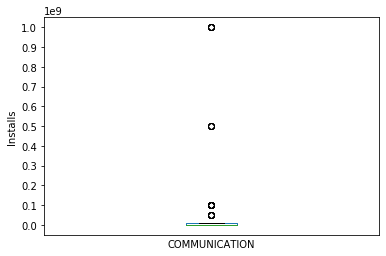

In [146]:
(android_clean[android_clean['Category'] == 'COMMUNICATION']['Installs']
 .plot.box())
plt.yticks(np.arange(0,1000000001,100000000))
plt.xticks([])
plt.xlabel('COMMUNICATION')
plt.ylabel('Installs')
plt.show()

The box plot shows some outliers that scatters extremely from the rest of the applications. While most of the apps have under 10M Installs, WhatsApp, Messenger, Hangouts, Chrome, Skype have more than 1B Installs. This explains why Communication hold the one of the highest positions. The same goes for Social and Video_Players.

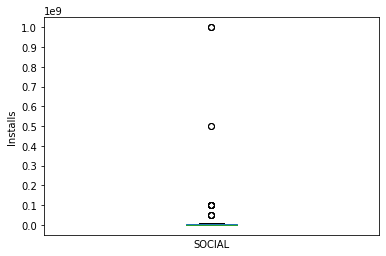

In [148]:
(android_clean[android_clean['Category'] == 'SOCIAL']['Installs']
 .plot.box())
plt.yticks(np.arange(0,1000000001,100000000))
plt.xticks([])
plt.xlabel('SOCIAL')
plt.ylabel('Installs')
plt.show()

If we remove well-known applications with extremely high number of installs, the averages number of installs will significantly drop. However, we don't want to compete in a market where it has lots of driven apps desgined by giant tech companies. Unless we aim to a niche section or have a creative idea, it would be tough to get users with the similar kind of applications. We will choose a different category where it has higher successful rate.<br>

Let's take a look at Photography.

In [168]:
(android_clean[android_clean['Category'] == 'PHOTOGRAPHY']
 [['App','Installs']].sort_values('Installs', ascending = False))[:20]

,App,Installs
2111,Google Photos,1000000000
3515,"S Photo Editor - Collage Maker , Photo Collage",100000000
2159,Camera360: Selfie Photo Editor with Funny Sticker,100000000
2126,Retrica,100000000
7118,LINE Camera - Photo editor,100000000
2136,Photo Editor Pro,100000000
2089,"Sweet Selfie - selfie camera, beauty cam, phot...",100000000
2147,BeautyPlus - Easy Photo Editor & Selfie Camera,100000000
2148,PicsArt Photo Studio: Collage Maker & Pic Editor,100000000
3969,AR effect,100000000


In [169]:
# Photography apps with less than 50M installs
photo_50M_less = android_clean[(android_remove_Google['Category'] == 'PHOTOGRAPHY') &
              (android_clean['Installs']<50000000)]
photo_50M_less.shape[0]

220

In [176]:
# Photography apps with more than/equal 50M installs
android_clean[android_clean['Category'] == 'PHOTOGRAPHY'].shape[0]-1-photo_50M_less.shape[0]

40

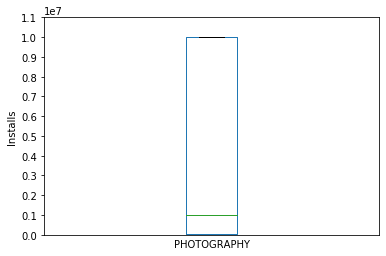

In [184]:
(photo_50M_less[photo_50M_less['Category'] == 'PHOTOGRAPHY']['Installs']
 .plot.box())
plt.xticks([])
plt.ylim(0,1100000)
plt.yticks(np.arange(0,11000001,1000000))
plt.xlabel('PHOTOGRAPHY')
plt.ylabel('Installs')
plt.show()

Photography has a giant is Google Photos, but this app is more like a storage cloud than an application for photography. There are 40 applications with 50M to 100M installs and 50% of 220 remaining applications with more than 10M installs. This category shows the potential to be invested in. We don't have many giants applications in here. Photo/Video Editor category is also broad enough for developers to define a niche target or innovate creative features to attract users.<br>

Now, we need to see whether Photo&Video got attention of users in Apple Store.

#### Number of Installations - Apple Store
In Apple Store dataset, we don't have a direct data for installations, we will use column rating_count_tot column which is the total number of user rating as a wordaround. 

In [26]:
(apple_clean.groupby('prime_genre')['rating_count_tot']
     .agg('mean')
     .apply(lambda x: '%.f'%x)
     .astype(int)
    .sort_values(ascending = False))

prime_genre
Reference            67448
Music                56482
Social Networking    53078
Weather              47221
Photo & Video        27250
Navigation           25972
Travel               20216
Food & Drink         20179
Sports               20129
Health & Fitness     19952
Productivity         19054
Games                18925
Shopping             18747
News                 15893
Utilities            14010
Finance              13522
Entertainment        10823
Lifestyle             8978
Book                  8498
Business              6368
Education             6266
Catalogs              1780
Medical                460
Name: rating_count_tot, dtype: int64

Photo & Video is in top 5 genres with highest total of ratings. It means this genre gets enough attention from Apple store.

In [186]:
apple_clean[apple_clean['prime_genre']=='Photo & Video'][['track_name','rating_count_tot']]

,track_name,rating_count_tot
1,Instagram,2161558
54,Snapchat,323905
65,"YouTube - Watch Videos, Music, and Live Streams",278166
166,Pic Collage - Picture Editor & Photo Collage M...,123433
167,Funimate video editor: add cool effects to videos,123268
...,...,...
6736,NaN,0
6786,"BlurEffect-Blur Photo & Video, Hide Face",0
6923,camera for filter,0
7023,"Emojil - original emoji stamp, decoration camera",0


The first three applications are not dedicated for editor, let's remove them.

In [188]:
apple_clean[apple_clean['prime_genre']=='Photo & Video'][['track_name','rating_count_tot']][3:13]

,track_name,rating_count_tot
166,Pic Collage - Picture Editor & Photo Collage M...,123433
167,Funimate video editor: add cool effects to videos,123268
207,musical.ly - your video social network,105429
229,Photo Collage Maker & Photo Editor - Live Collage,93781
233,Vine Camera,90355
236,Google Photos - unlimited photo and video storage,88742
254,Flipagram,79905
333,Mixgram - Picture Collage Maker - Pic Photo Ed...,54282
346,"Shutterfly: Prints, Photo Books, Cards Made Easy",51427
347,"Pic Jointer – Photo Collage, Camera Effects Ed...",51330


We can see that some of the photo editors applications have more than 100,000 rating. With the high demand of editing photos quick and easy, many people are willing to install a new application if it offers cool features to edit photos.

## Conclusions
We have been using the data from Google Play store and Apple store to identify a potential market for ExcellentApps company to invest in. <br>

As we saw many categories has outstanding popularity and significant high number of installs, it is extremely skewed by some giants in the industries. We decided to move away from those categories, instead, we chose Photography. This category receives considerable attention from users and has higher chance of successful.